# Examination of Digital Community Conversations Within Specific Disease States Via Reddit

- **Vision**: Development of a repeatable process for the analysis of Reddit conversations
within specific condition and/or disease state with applicable threads and subreddit
threads (subreddits) to potentially inform strategy and content development. Create a
simplified and repeatable process that does not require the users to be fluent in Reddit.
- **Issue**: While Reddit offers robust, open, and community-minded discussions surrounding
conditions and disease states, Reddit also provides volumes of unstructured and
unclassified data. The development of a repeatable process – that continues to monitor
evolving conversations over time – currently requires multiple tools (ex. – tools to scrape
threads, tools to analyze keyword content, tools to analyze sentiment, etc.).
- **Method**: After identifying priority conditions and/or disease states with active Reddit
communities (ex. – prostate cancer, breast cancer, HIV, etc.), build relational taxonomy
(ex. – medicine, treatment, and adherence all have specific topics but have relational
discussions) of topical themes addressed within.
- **Potential Output**: Provide use case for healthcare companies on the importance of
Reddit as an early source of social indicator of trends and conversational “lexicon” to be
used for patient communications and programs.

# <font color='Green'><center>Milestone 2: Data Analysis and Visualization</font>

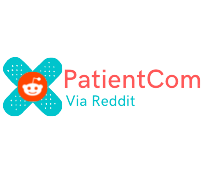

In [1]:
from IPython.display import Image
Image(filename='img/logo.png')

In [2]:
'''
Needed librairies
'''
import requests
import pandas as pd
import numpy as np

'''
Data analysis and Wrangling
'''
import pandas as pd
import numpy as np
import random as rnd
from datetime import date, datetime, time, timedelta
import datetime as dt

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as mtic
import matplotlib.pyplot as plot
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
'''
Importing the data from: dataset-milestone1
pip install ipynb
'''
from dataset_milestone1 import df


In [4]:
df.tail()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,id,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,media,is_video
295,COVID19,Spread of SARS-CoV-2 Delta variant infections ...,,0.88,23.0,0.0,23.0,,1.631953e+09,pqij58,...,[],None,/r/COVID19/comments/pqij58/spread_of_sarscov2_...,all_ads,False,https://www.medrxiv.org/content/10.1101/2021.0...,349892.0,0.0,None,False
296,COVID19,SARS-CoV-2-IgG response is different in COVID-...,,0.87,18.0,0.0,18.0,,1.631951e+09,pqi1r6,...,[],None,/r/COVID19/comments/pqi1r6/sarscov2igg_respons...,all_ads,False,https://www.sciencedirect.com/science/article/...,349892.0,0.0,None,False
297,COVID19,COVID-19 vaccine effectiveness against hospita...,,0.84,21.0,0.0,21.0,,1.631933e+09,pqe5fc,...,[],None,/r/COVID19/comments/pqe5fc/covid19_vaccine_eff...,all_ads,False,https://www.medrxiv.org/content/10.1101/2021.0...,349892.0,0.0,None,False
298,COVID19,Blunted peripheral but not cerebral vasodilato...,,0.80,19.0,0.0,19.0,,1.631912e+09,pq8j21,...,[],None,/r/COVID19/comments/pq8j21/blunted_peripheral_...,all_ads,False,https://journals.physiology.org/doi/full/10.11...,349892.0,0.0,None,False
299,COVID19,"Comparative Effectiveness of Moderna, Pfizer-B...",,0.93,68.0,0.0,68.0,,1.631911e+09,pq8dgj,...,[],None,/r/COVID19/comments/pq8dgj/comparative_effecti...,all_ads,False,https://www.cdc.gov/mmwr/volumes/70/wr/mm7038e...,349892.0,0.0,None,False


# Data Preprocessing

Having a clean dataset in hand, we need to understand the data, summarize its characteristics, and visualize it.

Understanding the data is an iterative process between the data science team and the experts from the business side. It can help both sides to identify and construct important features, and later to build suitable machine learning models.

An essential part of data exploration is data transformation. Let’s clarify it by an example. Assume a forecasting problem in the field of logistics for a number of deliveries in different locations by different suppliers. One data transformation option is “filtering”. It is possible to filter one specific location, or one specific group of suppliers, and make the forecast on the filtered data to get a fast insight. Another tactic is called “aggregation”. If we have daily data, by making weekly or even monthly aggregation we can have a new data set which brings us insights to the existing seasonality and trends.


Some commonly used plots for EDA are:

    Histograms: to check the distribution of a specific variable
    Scatter plots: to check the dependency between two variables
    Maps: to show distribution of a variable on a regional or world map
    Feature correlation plot (heatmap): to understand the dependencies between multiple variables
    Time series plots: to identify trends and seasonality in time dependent data


In [5]:
'''
df columns
'''
# iterating the columns
for col in df.columns:
    print(col)

subreddit
title
selftext
upvote_ratio
ups
downs
score
link_flair_css_class
created_utc
id
kind
approved_at_utc
saved
mod_reason_title
gilded
clicked
link_flair_richtext
subreddit_name_prefixed
hidden
pwls
top_awarded_type
hide_score
name
quarantine
link_flair_text_color
author_flair_background_color
subreddit_type
total_awards_received
media_embed
author_flair_template_id
is_original_content
user_reports
secure_media
is_reddit_media_domain
is_meta
category
secure_media_embed
link_flair_text
can_mod_post
approved_by
thumbnail
edited
author_flair_css_class
gildings
content_categories
is_self
mod_note
created
link_flair_type
wls
removed_by_category
banned_by
domain
allow_live_comments
selftext_html
likes
suggested_sort
banned_at_utc
view_count
archived
no_follow
is_crosspostable
pinned
over_18
all_awardings
awarders
media_only
can_gild
spoiler
locked
author_flair_text
treatment_tags
visited
removed_by
num_reports
distinguished
subreddit_id
mod_reason_by
removal_reason
link_flair_backgroun

In [6]:
'''
Describing the data: What are my data columns?
'''
print(df.columns.values)

['subreddit' 'title' 'selftext' 'upvote_ratio' 'ups' 'downs' 'score'
 'link_flair_css_class' 'created_utc' 'id' 'kind' 'approved_at_utc'
 'saved' 'mod_reason_title' 'gilded' 'clicked' 'link_flair_richtext'
 'subreddit_name_prefixed' 'hidden' 'pwls' 'top_awarded_type' 'hide_score'
 'name' 'quarantine' 'link_flair_text_color'
 'author_flair_background_color' 'subreddit_type' 'total_awards_received'
 'media_embed' 'author_flair_template_id' 'is_original_content'
 'user_reports' 'secure_media' 'is_reddit_media_domain' 'is_meta'
 'category' 'secure_media_embed' 'link_flair_text' 'can_mod_post'
 'approved_by' 'thumbnail' 'edited' 'author_flair_css_class' 'gildings'
 'content_categories' 'is_self' 'mod_note' 'created' 'link_flair_type'
 'wls' 'removed_by_category' 'banned_by' 'domain' 'allow_live_comments'
 'selftext_html' 'likes' 'suggested_sort' 'banned_at_utc' 'view_count'
 'archived' 'no_follow' 'is_crosspostable' 'pinned' 'over_18'
 'all_awardings' 'awarders' 'media_only' 'can_gild' 'spo

In [7]:
'''
Describing the data: data description?
'''
df.describe()

,upvote_ratio,ups,downs,score,created_utc,gilded,pwls,total_awards_received,created,wls,num_comments,subreddit_subscribers,num_crossposts
count,3900.000000,3900.000000,3900.0,3900.000000,3.900000e+03,3900.000000,3900.000000,3900.000000,3.900000e+03,3900.000000,3900.000000,3.900000e+03,3900.000000
mean,0.894656,197.116410,0.0,197.116410,1.629659e+09,0.002564,2.769231,0.198462,1.629659e+09,2.767692,26.951026,1.552600e+06,0.139487
std,0.131191,1560.410929,0.0,1560.410929,6.549796e+06,0.050578,2.991495,1.515449,6.549796e+06,2.990604,112.216355,4.118681e+06,0.695886
min,0.180000,0.000000,0.0,0.000000,1.593885e+09,0.000000,0.000000,0.000000,1.593885e+09,0.000000,0.000000,1.877000e+03,0.000000
25%,0.840000,3.000000,0.0,3.000000,1.628787e+09,0.000000,0.000000,0.000000,1.628787e+09,0.000000,2.000000,3.818000e+03,0.000000
50%,0.940000,10.000000,0.0,10.000000,1.632250e+09,0.000000,0.000000,0.000000,1.632250e+09,0.000000,7.000000,4.108600e+04,0.000000
75%,1.000000,44.000000,0.0,44.000000,1.633454e+09,0.000000,6.000000,0.000000,1.633454e+09,6.000000,19.000000,3.572740e+05,0.000000
max,1.000000,37398.000000,0.0,37398.000000,1.634032e+09,1.000000,6.000000,40.000000,1.634032e+09,6.000000,2594.000000,1.562514e+07,13.000000


In [8]:
'''
Describing the data: What are the data types for various features?
'''
df.info()
print('_'*40)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 299
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   subreddit                      3900 non-null   object 
 1   title                          3900 non-null   object 
 2   selftext                       3900 non-null   object 
 3   upvote_ratio                   3900 non-null   float64
 4   ups                            3900 non-null   float64
 5   downs                          3900 non-null   float64
 6   score                          3900 non-null   float64
 7   link_flair_css_class           2413 non-null   object 
 8   created_utc                    3900 non-null   float64
 9   id                             3900 non-null   object 
 10  kind                           3900 non-null   object 
 11  approved_at_utc                0 non-null      object 
 12  saved                          3900 non-null   ob

In [9]:
'''
Returning number of features
'''
print('Number of features is: ', len(df.columns))

Number of features is:  98


In [10]:
'''
Returning number of rows
'''
print('Number of rows is: ', len(df))

Number of rows is:  3900


In [11]:
'''
Returning the overall shape
'''
print('Overall shape of data is: ', (df.shape))

Overall shape of data is:  (3900, 98)


In [12]:
'''
brief description
'''

df.describe(include=['O'])

,subreddit,title,selftext,link_flair_css_class,id,kind,approved_at_utc,saved,mod_reason_title,clicked,...,whitelist_status,contest_mode,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,media,is_video
count,3900,3900,3900,2413,3900,3900,0,3900.0,0,3900.0,...,3900,3900.0,3900,622,3900,3900,3900.0,3900,79,3900.0
unique,13,3813,1711,37,3900,1,0,1.0,0,1.0,...,3,2.0,1,3,3900,2,2.0,3871,74,2.0
top,disease,UNDIAGNOSED? NEED ADVICE/HAVE QUESTIONS? POST ...,,,q5kcbc,t3,NaN,0.0,NaN,0.0,...,no_ads,0.0,[],dark,/r/disease/comments/q5kcbc/global_handwashing_...,no_ads,0.0,https://mancavehealth.org/virtualsupport,"{'type': 'youtube.com', 'oembed': {'provider_u...",0.0
freq,300,9,2085,1708,1,3900,NaN,3900.0,NaN,3900.0,...,2100,3874.0,3900,411,1,2100,3887.0,4,2,3899.0


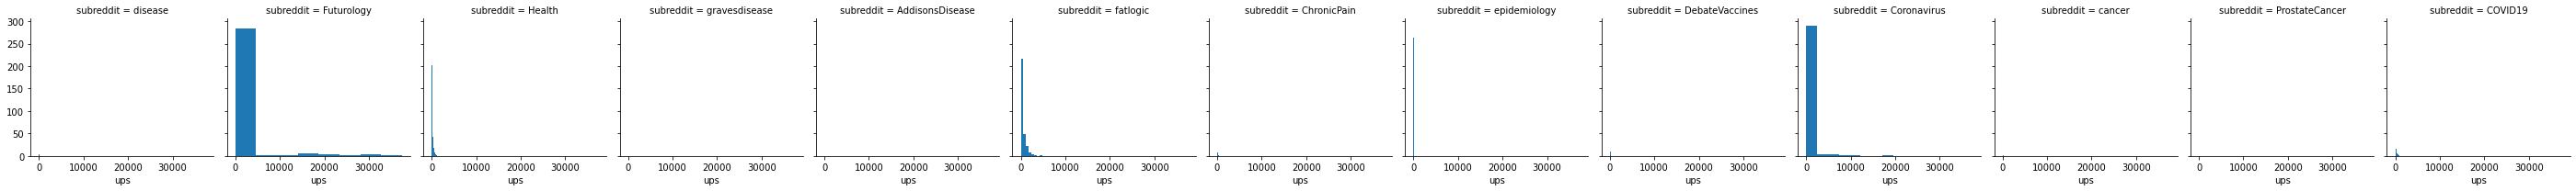

In [13]:
'''
Analyze by visualizing data PART I
'''
g = sns.FacetGrid(df, col='subreddit')
g.map(plt.hist, 'ups', bins=8)

# Data Preparation

Data preparation is cleaning and organizing the real-world data, which is known to take up more than 80% of the time of a data scientist’s work. Real-world data or raw data is dirty, full of missing values, duplicates and in some cases wrong information. Most machine learning algorithms cannot deal with missing values; hence, data needs to be converted and cleaned. Common solutions of handling missing values would be dropping rows, linear interpolation, using mean values etc. Depending on the importance of the feature and amount of the missing values one of these solutions can be employed

In [115]:
'''
Showcasing the null values
'''
print(df.isnull().sum())

subreddit            0
title                0
selftext             0
upvote_ratio         0
ups                  0
                  ... 
num_crossposts       0
media             3821
is_video             0
uneDate              0
tarikh               0
Length: 100, dtype: int64


We can see that the columns 'author_flair_text', 'removed_by', 'totla_award_recieved' and 'awrders' have lots of missing values so it would be better to drop them

In [17]:
# Checking for if there is any null values
df.isnull().sum()

subreddit                   0
title                       0
selftext                    0
upvote_ratio                0
ups                         0
                         ... 
url                         0
subreddit_subscribers       0
num_crossposts              0
media                    3821
is_video                    0
Length: 98, dtype: int64

In [116]:
df.drop(['author_flair_text', 'removed_by', 'total_awards_received', 'awarders'],axis = 1, inplace = True)

In [102]:
'''
converting dates from string to datetime objects
'''
#df['created_utc']=pd.to_datetime(df['created_utc'], format='%Y-%m-%d').dt.date
#df['created_utc'].tail()

# converting the integers to datetime format
# converting the float to datetime format 
import datetime as dt
from dateutil import parser

df['tarikh'] = pd.to_numeric(df['created_utc'], downcast='integer')
df['uneDate'] = pd.to_datetime(df['created_utc'], format='%Y-%m-%d') 
df['uneDate']

0     1970-01-01 00:00:01.633912230
1     1970-01-01 00:00:01.633775976
2     1970-01-01 00:00:01.633732599
3     1970-01-01 00:00:01.633732339
4     1970-01-01 00:00:01.633731677
                   ...             
295   1970-01-01 00:00:01.631953117
296   1970-01-01 00:00:01.631950526
297   1970-01-01 00:00:01.631932566
298   1970-01-01 00:00:01.631911960
299   1970-01-01 00:00:01.631911446
Name: uneDate, Length: 3900, dtype: datetime64[ns]

In [117]:
'''
Removing duplicates on ticket dataframe as there were some tickets scanned multiple times per call out
'''
df.shape

(3900, 96)



We have already seen that there is one missing value in the column title


In [119]:
# filling the missing value in the column 'title'
df['title'].fillna(" ", inplace=True)

In [129]:
# Finally checking if there is any null values
#df.drop(['id', 'media'], axis=1, inplace=True)
df.drop(['uneDate', 'tarikh'], axis=1, inplace=True)
df.isnull().sum()

subreddit                0
title                    0
selftext                 0
upvote_ratio             0
ups                      0
                        ..
stickied                 0
url                      0
subreddit_subscribers    0
num_crossposts           0
is_video                 0
Length: 92, dtype: int64

In [130]:
df.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,kind,...,contest_mode,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,is_video
0,disease,Global Handwashing day,,1.0,3.0,0.0,3.0,vid,1.633912e+09,t3,...,0.0,[],None,/r/disease/comments/q5kcbc/global_handwashing_...,all_ads,0.0,https://youtu.be/IfusdJ-169E,2396.0,0.0,0.0
1,disease,We're living through two of the ten deadliest ...,,1.0,1.0,0.0,1.0,vid,1.633776e+09,t3,...,False,[],None,/r/disease/comments/q4itxd/were_living_through...,all_ads,False,https://www.youtube.com/watch?v=wIMzczjjYuc,2396.0,0.0,False
2,disease,"Brazil Passes 600,000 COVID Deaths, Second Onl...",,1.0,9.0,0.0,9.0,media,1.633733e+09,t3,...,False,[],dark,/r/disease/comments/q48k4h/brazil_passes_60000...,all_ads,False,https://www.voanews.com/a/brazil-passes-600-00...,2396.0,1.0,False
3,disease,New Ebola Case Confirmed in Eastern DR Congo,,1.0,2.0,0.0,2.0,media,1.633732e+09,t3,...,False,[],dark,/r/disease/comments/q48h8j/new_ebola_case_conf...,all_ads,False,https://www.voanews.com/a/new-ebola-case-confi...,2396.0,1.0,False
4,disease,COVID-19 Deaths Hit New Daily Record As Romani...,,1.0,3.0,0.0,3.0,media,1.633732e+09,t3,...,False,[],dark,/r/disease/comments/q48a03/covid19_deaths_hit_...,all_ads,False,https://www.rferl.org/a/romania-covid-record-f...,2396.0,1.0,False


In [132]:
df['text'] = df['title'] + ' ' + df['author']
df.drop(['title', 'author'], axis = 1, inplace = True)

In [134]:
df.head()

,subreddit,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,kind,approved_at_utc,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,is_video,text
0,disease,,1.0,3.0,0.0,3.0,vid,1.633912e+09,t3,None,...,[],None,/r/disease/comments/q5kcbc/global_handwashing_...,all_ads,0.0,https://youtu.be/IfusdJ-169E,2396.0,0.0,0.0,Global Handwashing day JooRooTv
1,disease,,1.0,1.0,0.0,1.0,vid,1.633776e+09,t3,None,...,[],None,/r/disease/comments/q4itxd/were_living_through...,all_ads,False,https://www.youtube.com/watch?v=wIMzczjjYuc,2396.0,0.0,False,We're living through two of the ten deadliest ...
2,disease,,1.0,9.0,0.0,9.0,media,1.633733e+09,t3,None,...,[],dark,/r/disease/comments/q48k4h/brazil_passes_60000...,all_ads,False,https://www.voanews.com/a/brazil-passes-600-00...,2396.0,1.0,False,"Brazil Passes 600,000 COVID Deaths, Second Onl..."
3,disease,,1.0,2.0,0.0,2.0,media,1.633732e+09,t3,None,...,[],dark,/r/disease/comments/q48h8j/new_ebola_case_conf...,all_ads,False,https://www.voanews.com/a/new-ebola-case-confi...,2396.0,1.0,False,New Ebola Case Confirmed in Eastern DR Congo S...
4,disease,,1.0,3.0,0.0,3.0,media,1.633732e+09,t3,None,...,[],dark,/r/disease/comments/q48a03/covid19_deaths_hit_...,all_ads,False,https://www.rferl.org/a/romania-covid-record-f...,2396.0,1.0,False,COVID-19 Deaths Hit New Daily Record As Romani...


In [136]:
# Let's categorize the data with over_18 as 1 and if not then with 0

df.over_18.replace([True, False], [1,0], inplace=True)

# Counting the values 
df.over_18.value_counts()

0    3883
1      17
Name: over_18, dtype: int64

In [137]:
df.head()

,subreddit,selftext,upvote_ratio,ups,downs,score,link_flair_css_class,created_utc,kind,approved_at_utc,...,mod_reports,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,num_crossposts,is_video,text
0,disease,,1.0,3.0,0.0,3.0,vid,1.633912e+09,t3,None,...,[],None,/r/disease/comments/q5kcbc/global_handwashing_...,all_ads,0.0,https://youtu.be/IfusdJ-169E,2396.0,0.0,0.0,Global Handwashing day JooRooTv
1,disease,,1.0,1.0,0.0,1.0,vid,1.633776e+09,t3,None,...,[],None,/r/disease/comments/q4itxd/were_living_through...,all_ads,False,https://www.youtube.com/watch?v=wIMzczjjYuc,2396.0,0.0,False,We're living through two of the ten deadliest ...
2,disease,,1.0,9.0,0.0,9.0,media,1.633733e+09,t3,None,...,[],dark,/r/disease/comments/q48k4h/brazil_passes_60000...,all_ads,False,https://www.voanews.com/a/brazil-passes-600-00...,2396.0,1.0,False,"Brazil Passes 600,000 COVID Deaths, Second Onl..."
3,disease,,1.0,2.0,0.0,2.0,media,1.633732e+09,t3,None,...,[],dark,/r/disease/comments/q48h8j/new_ebola_case_conf...,all_ads,False,https://www.voanews.com/a/new-ebola-case-confi...,2396.0,1.0,False,New Ebola Case Confirmed in Eastern DR Congo S...
4,disease,,1.0,3.0,0.0,3.0,media,1.633732e+09,t3,None,...,[],dark,/r/disease/comments/q48a03/covid19_deaths_hit_...,all_ads,False,https://www.rferl.org/a/romania-covid-record-f...,2396.0,1.0,False,COVID-19 Deaths Hit New Daily Record As Romani...




We can see that the values in the over_18 has been removed with 0 for False similarly it should have been with 1 for True values


# Exploratory Data Analysis

In [107]:
pd.Series(np.concatenate([x.split() for x in df.title])).value_counts()

of              1008
to               998
the              951
and              812
in               725
                ... 
Below              1
⬇️                 1
doc?               1
Wisdom             1
March–August       1
Length: 13000, dtype: int64

In [108]:
pd.Series(' '.join(df.title).split()).value_counts()[:3]

of     1008
to      998
the     951
dtype: int64

In [109]:
df.title

0                                 Global Handwashing day
1      We're living through two of the ten deadliest ...
2      Brazil Passes 600,000 COVID Deaths, Second Onl...
3           New Ebola Case Confirmed in Eastern DR Congo
4      COVID-19 Deaths Hit New Daily Record As Romani...
                             ...                        
295    Spread of SARS-CoV-2 Delta variant infections ...
296    SARS-CoV-2-IgG response is different in COVID-...
297    COVID-19 vaccine effectiveness against hospita...
298    Blunted peripheral but not cerebral vasodilato...
299    Comparative Effectiveness of Moderna, Pfizer-B...
Name: title, Length: 3900, dtype: object

In [110]:
from collections import Counter
c = Counter()

In [112]:
df.title.str.split()

0                             [Global, Handwashing, day]
1      [We're, living, through, two, of, the, ten, de...
2      [Brazil, Passes, 600,000, COVID, Deaths,, Seco...
3      [New, Ebola, Case, Confirmed, in, Eastern, DR,...
4      [COVID-19, Deaths, Hit, New, Daily, Record, As...
                             ...                        
295    [Spread, of, SARS-CoV-2, Delta, variant, infec...
296    [SARS-CoV-2-IgG, response, is, different, in, ...
297    [COVID-19, vaccine, effectiveness, against, ho...
298    [Blunted, peripheral, but, not, cerebral, vaso...
299    [Comparative, Effectiveness, of, Moderna,, Pfi...
Name: title, Length: 3900, dtype: object

# Visualization

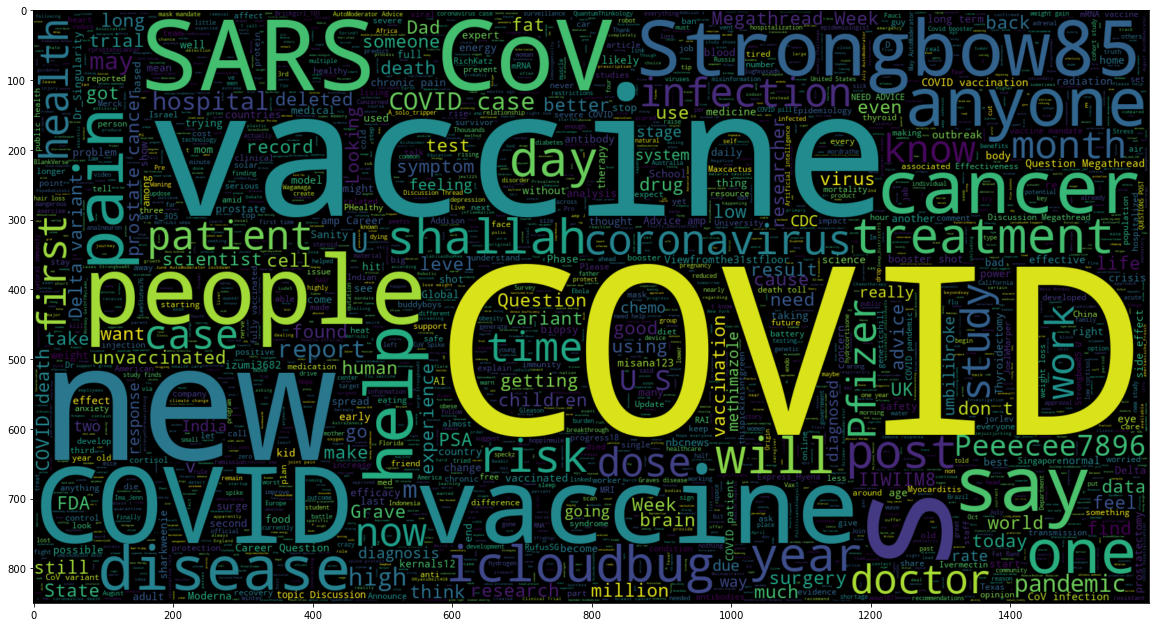

In [139]:
'''
WordCloud Visualization
'''

plt.figure(figsize = (20,20))
W_C = WordCloud(min_font_size=3, max_words=3200, width=1600, height=850, stopwords=STOPWORDS).generate(str(" ".join(df.text)))
plt.imshow(W_C, interpolation='bilinear')

In [140]:
# Using the W_C described above lets get the most frequently words used from Wordcloud of over_18_False

insights = W_C.process_text(str(" ".join(df.text)))
insights

{'Global': 21,
 'Handwashing': 1,
 'day': 81,
 'JooRooTv': 1,
 'living': 15,
 'two': 28,
 'ten': 7,
 'deadliest': 2,
 'time': 63,
 'JessGarden': 1,
 'Brazil': 9,
 'passes': 7,
 'COVID': 436,
 'second': 21,
 'Strongbow85': 116,
 'new': 185,
 'Ebola': 9,
 'case': 59,
 'confirmed': 8,
 'Eastern': 2,
 'Dr': 18,
 'Congo': 8,
 'hit': 23,
 'daily': 25,
 'record': 41,
 'Romania': 4,
 'surge': 21,
 'technology': 11,
 'Differentiation': 1,
 'Bacterial': 4,
 'viral': 16,
 '08OCT21': 1,
 'IIWIIM8': 45,
 'natural': 10,
 'bacteria': 5,
 'wipe': 1,
 'dengue': 4,
 'carrying': 2,
 'mosquitoes': 5,
 'Australian': 4,
 'research': 43,
 '04OCT21': 1,
 'million': 39,
 'Delta': 23,
 'variant': 34,
 'sweeps': 1,
 'world': 42,
 'Russia': 11,
 'fourth': 5,
 'straight': 5,
 'U': 52,
 's': 164,
 'coronavirus': 65,
 'death': 42,
 'toll': 1,
 'surpasses': 5,
 'Despite': 1,
 'Wide': 5,
 'Availability': 1,
 'clinical': 15,
 'show': 22,
 'promise': 4,
 'Chikungunya': 2,
 'vaccine': 219,
 '27SEP21': 1,
 'cultural': 1,


In [141]:
len(insights)

9141

In [145]:
# Lets sort the dictionary on the basis of key_values

insights = sorted(insights, key = lambda kv:(kv[1], kv[0]))
insights

[('03JAN21', 1),
 ('04OCT21', 1),
 ('05DEC20', 1),
 ('06APR21', 1),
 ('06AUG20', 1),
 ('06SEP20', 1),
 ('07JUL21', 1),
 ('07JUN21', 1),
 ('08DEC20', 1),
 ('08OCT21', 1),
 ('09MAY21', 1),
 ('09OCT20', 1),
 ('1000000students', 1),
 ("100k'", 1),
 ('10AUG21', 1),
 ('10MAY21', 1),
 ('10SEP20', 1),
 ('10mg', 1),
 ('11B', 1),
 ('11FEB21', 1),
 ('11JUN21', 1),
 ('11MAY20', 1),
 ('1200ish', 1),
 ('1250x', 1),
 ('12FEB21', 1),
 ('12SEP20', 1),
 ('12s', 1),
 ('14MAY21', 1),
 ('16DEC20', 1),
 ('16SEP20', 1),
 ('16lbs', 1),
 ('16th', 1),
 ('17th', 1),
 ('17x', 1),
 ('1800s', 1),
 ('18K', 1),
 ('18MAY21', 1),
 ('18PavliS', 1),
 ('18months', 1),
 ('18s', 1),
 ('18yr', 1),
 ('198Throwawayy', 1),
 ('19th', 1),
 ('1b', 1),
 ('1stCavNam', 1),
 ('20DEC20', 1),
 ('20FEB21', 1),
 ('20NOV20', 1),
 ('20SEP20', 1),
 ('20lb', 1),
 ('20th', 1),
 ('21JUL20', 1),
 ('22JUN21', 1),
 ('22MAR2021', 1),
 ('23APR21', 1),
 ('23rd', 1),
 ('241M', 1),
 ('24JUL20', 1),
 ('24JUN21', 1),
 ('24hr', 1),
 ('25APR21', 1),
 ('25A

In [146]:
ans_true = []
for i in insights:
    ans_true.append(i[0])
ans_true [:5] 

['03JAN21', '04OCT21', '05DEC20', '06APR21', '06AUG20']

In [147]:
# Now for every word in each test data point, lets check that if any word of that test data point is either present, if word is present, then I will simply predict 1, else 0.

predictions = []
for i in df.text:
    x = i.split()  # splitting the word in test_text
    for j in x:
        if j in ans_true:
            predictions.append(1)
            break
        else:
            predictions.append(0)
            break
            
len(predictions)

3900

In [155]:
test_category = df['over_18'][:]
len(test_category)

3900

In [156]:
# Counting for how many times predictions is same as test_category

count = 0
for i in range(len(predictions)):
    test_category = list(test_category)
    if (predictions[i] == int(test_category[i])):
        count += 1
        
print(count)

2835


In [157]:
# Checking the accuracy of the match in predictions and test_category

accuracy = (count/len(predictions))*100

print("Accuracy obtained using the WordCloud is: ", accuracy, "%")

Accuracy obtained using the WordCloud is:  72.6923076923077 %




Its giving around an accuracy of almost 73% or if saying the exact valu its 72.69% accurate which is good
